resources:
- https://arxiv.org/pdf/2007.07966
- https://link.springer.com/article/10.1007/s10772-020-09681-3


- https://arxiv.org/pdf/2007.11154
- https://arxiv.org/pdf/2105.12395
- https://ieeexplore.ieee.org/document/10258355

In [2]:
import pandas as pd

df = pd.read_csv("/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/metadata/UrbanSound8K.csv")
print(df.head(10))  # Display first few rows

      slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  childr

In [4]:
print(df.info())  # Data types and missing values
print(df["class"].value_counts())  # Number of samples per class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB
None
class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


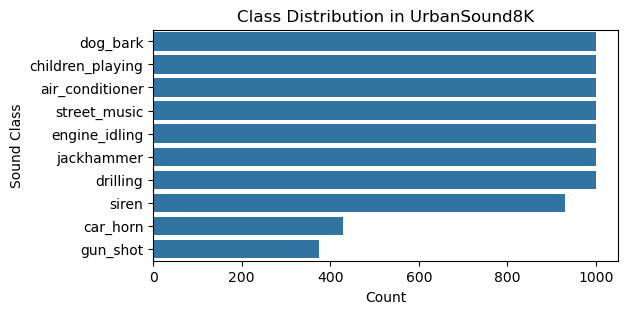

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.countplot(y=df["class"], order=df["class"].value_counts().index)
plt.title("Class Distribution in UrbanSound8K")
plt.xlabel("Count")
plt.ylabel("Sound Class")
plt.show()


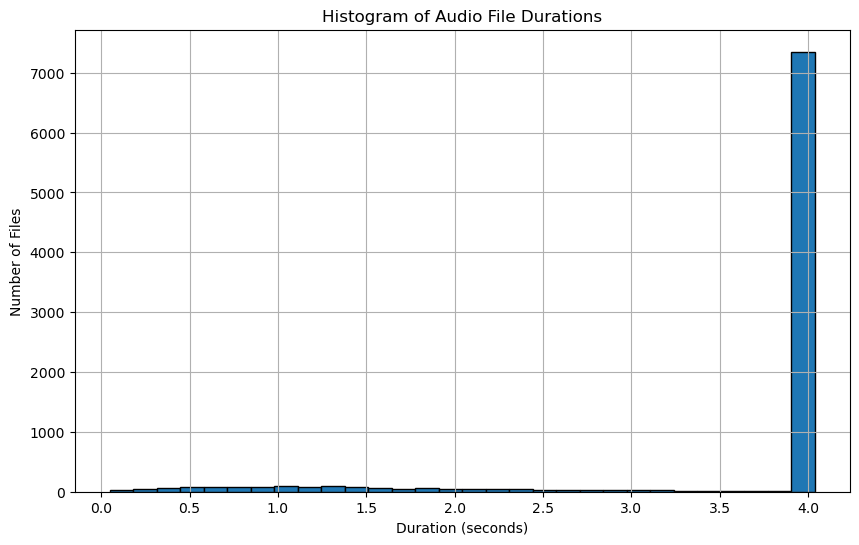

In [1]:
import os
import librosa

# List to hold duration of each audio file (in seconds)
audio_lengths = []

# Base path to your audio directory
audio_base_path = '/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/audio'

# Iterate over the 10 folds
for fold in range(1, 11):
    fold_path = os.path.join(audio_base_path, f'fold{fold}')
    for file_name in os.listdir(fold_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(fold_path, file_name)
            # Load audio file using librosa
            y, sr = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate
            # Calculate duration of the file in seconds
            duration = librosa.get_duration(y=y, sr=sr)
            audio_lengths.append(duration)

# Plotting the histogram of audio durations
plt.figure(figsize=(10, 6))
plt.hist(audio_lengths, bins=30, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Files')
plt.title('Histogram of Audio File Durations')
plt.yscale('log')
plt.grid(True)
plt.show()


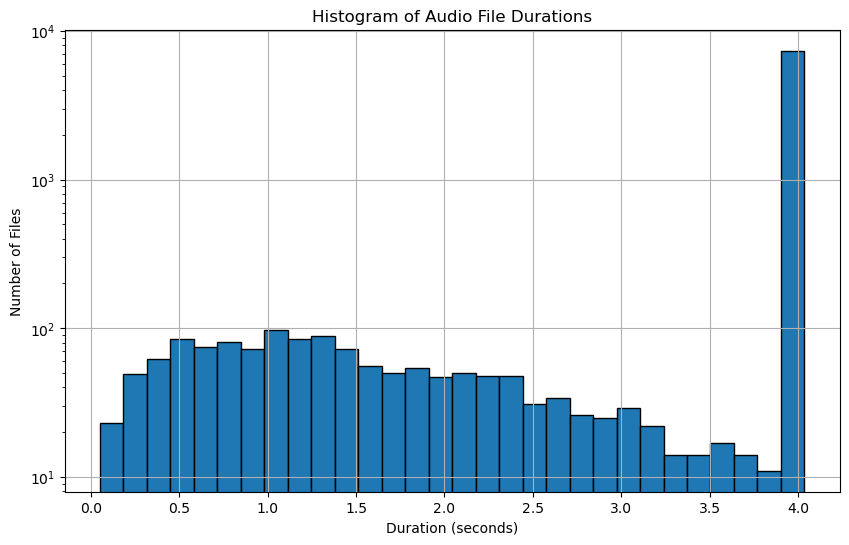

In [2]:
plt.figure(figsize=(10, 6))
plt.hist(audio_lengths, bins=30, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Files')
plt.title('Histogram of Audio File Durations')
plt.yscale('log')
plt.grid(True)
plt.show()

In [8]:
# Dictionaries to store counts of files under 4 seconds and duration statistics per class.
under_4s_counts = {}
total_durations = {}  # Sum of durations per class.
file_counts = {}      # Number of files per class.

# Iterate through each row in the metadata.
for _, row in df.iterrows():
    # Each row provides the fold and the file name.
    fold = f"fold{row['fold']}"  # e.g., fold1, fold2, ...
    file_name = row['slice_file_name']
    audio_path = os.path.join(audio_base_path, fold, file_name)
    
    try:
        # Load the audio file with its original sampling rate.
        y, sr = librosa.load(audio_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        continue

    # Update total durations and file counts for average calculation.
    class_name = row['class']  # Using the class name from the CSV.
    total_durations[class_name] = total_durations.get(class_name, 0.0) + duration
    file_counts[class_name] = file_counts.get(class_name, 0) + 1

    # Check if duration is less than 4 seconds.
    if duration < 4.0:
        under_4s_counts[class_name] = under_4s_counts.get(class_name, 0) + 1

# Print the count of files under 4 seconds for each class.
print("Number of audio files under 4 seconds per class:")
for cls, count in under_4s_counts.items():
    print(f"{cls}: {count}")

# Compute and print the average duration of the audio files per class.
print("\nAverage duration of audio files per class:")
for cls in total_durations:
    average_duration = total_durations[cls] / file_counts[cls]
    print(f"{cls}: {average_duration:.2f} seconds")


Number of audio files under 4 seconds per class:
dog_bark: 325
car_horn: 226
gun_shot: 358
jackhammer: 197
drilling: 195
siren: 32
engine_idling: 39
air_conditioner: 3
children_playing: 24

Average duration of audio files per class:
dog_bark: 3.15 seconds
children_playing: 3.96 seconds
car_horn: 2.46 seconds
air_conditioner: 3.99 seconds
street_music: 4.00 seconds
gun_shot: 1.65 seconds
siren: 3.91 seconds
engine_idling: 3.94 seconds
jackhammer: 3.61 seconds
drilling: 3.55 seconds


Spectrogram shape: (128, 131)


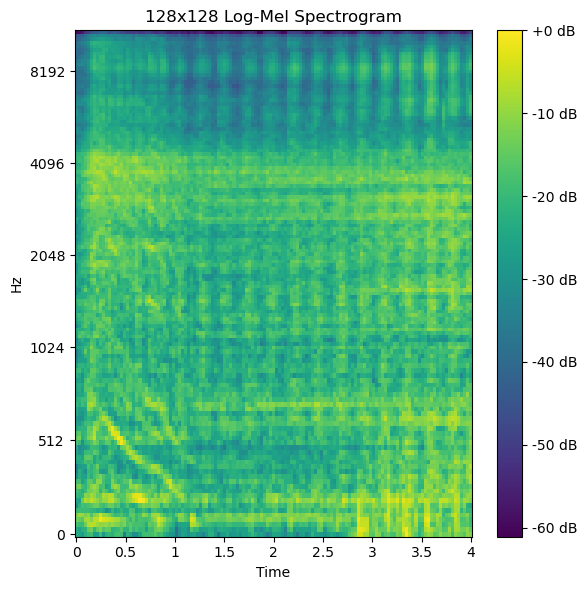

In [ ]:
import librosa.display
import numpy as np

# File path to your audio file
file_path = '/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/audio/fold1/14113-4-0-0.wav'

# Target duration and sample rate
target_duration = 4.0    # in seconds
sr = 22050               # sampling rate (UrbanSound8K is 22050 Hz)

# Load the audio file
y, sr = librosa.load(file_path, sr=sr)

# Ensure the audio is exactly 4 seconds: pad with zeros or trim as needed
''' I am aware that eg. the gunshots have a very high amount of padding since 
    the files are very short in average and that the model will probably use this
    to learn classification and i am very open to suggestions on how to combat this.
    For now i will just ignore this fact... '''
expected_length = int(target_duration * sr)
if len(y) < expected_length:
    y = np.pad(y, (0, expected_length - len(y)), mode='constant')
else:
    y = y[:expected_length]

# Parameters for the mel spectrogram
n_fft = 2048
hop_length = 678         # chosen so that the time dimension becomes 128 frames
n_mels = 128

# Compute the mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length, n_mels=n_mels)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Check the shape (should be 128 x 128)
print("Spectrogram shape:", S_dB.shape)

# Plot the log-mel spectrogram
plt.figure(figsize=(6, 6))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("128x128 Log-Mel Spectrogram")
plt.tight_layout()
plt.show()


In [17]:
# Directory for my new spectrograms
spec_base = '/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms'

# Audio and spectrogram parameters
target_duration = 4.0  # seconds
sr = 22050             # sampling rate
expected_length = int(sr * target_duration)  # total samples for 4 seconds

n_fft = 2048
hop_length = 678       # chosen to yield 128 time frames over 4 seconds
n_mels = 128

# Iterate through each fold folder
for fold in range(1, 11):
    fold_audio_path = os.path.join(audio_base_path, f'fold{fold}')
    fold_spec_path = os.path.join(spec_base, f'fold{fold}')
    os.makedirs(fold_spec_path, exist_ok=True)

    # Process each .wav file in the fold
    for file_name in os.listdir(fold_audio_path):
        if file_name.endswith('.wav'):
            audio_path = os.path.join(fold_audio_path, file_name)
            # Load audio (forcing the target sampling rate)
            y, _ = librosa.load(audio_path, sr=sr)

            # Pad with zeros or trim to ensure exactly 4 seconds
            if len(y) < expected_length:
                y = np.pad(y, (0, expected_length - len(y)), mode='constant')
            else:
                y = y[:expected_length]

            # Compute the Mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                               hop_length=hop_length, n_mels=n_mels)
            # Convert to log scale
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Define output path for the spectrogram image
            output_file = os.path.join(fold_spec_path, file_name.replace('.wav', '.png'))

            # Save the spectrogram as an image
            plt.imsave(output_file, S_dB, cmap='viridis')
            print("Saved spectrogram:", output_file)


Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/101415-3-0-2.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/101415-3-0-3.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/101415-3-0-8.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102106-3-0-0.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102305-6-0-0.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102842-3-0-1.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102842-3-1-0.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102842-3-1-5.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/102842-3-1-6.png
Saved spectrogram: /Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms/fold1/103074-7-0-0.png
Saved spec

KeyboardInterrupt: 

In [18]:
import os
from PIL import Image
from torch.utils.data import Dataset

class CustomSpectrogramDataset(Dataset):
    def __init__(self, root_dir, folds=None, transform=None):
        """
            The Dataset recommends to keep the structure for 10-Fold cross validation.
            folds (list or int, optional): The fold(s) to include. For example, 
            folds=1 or folds=[1,2,3]. If None, all folds are included.
        """
        self.root_dir = root_dir
        self.transform = transform
        
        # Convert a single fold to a list if needed
        if folds is None:
            self.folds = list(range(1, 11))
        elif isinstance(folds, int):
            self.folds = [folds]
        else:
            self.folds = folds
        
        # Create a list of all image file paths only for the specified folds
        self.image_paths = []
        for fold in self.folds:
            fold_dir = os.path.join(root_dir, f'fold{fold}')
            # Check if the fold directory exists
            if not os.path.isdir(fold_dir):
                raise ValueError(f"Directory {fold_dir} does not exist.")
            for file in os.listdir(fold_dir):
                if file.endswith('.png'):
                    self.image_paths.append(os.path.join(fold_dir, file))
        
        # Sort the file list for consistent ordering
        self.image_paths.sort()
        
        # Define the 10 UrbanSound8K classes for reference
        self.classes = [
            'air_conditioner', 
            'car_horn', 
            'children_playing', 
            'dog_bark',
            'drilling', 
            'engine_idling', 
            'gun_shot', 
            'jackhammer',
            'siren', 
            'street_music'
        ]
        
    def _extract_label(self, file_path):
        """Extracts the numeric class label from the filename (first number after the first '-')."""
        filename = os.path.basename(file_path)  # e.g., "74364-8-1-0.png"
        label = int(filename.split('-')[1])      # Extracts '8' and converts to integer
        return label

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        
        # Load image with error handling
        try:
            image = Image.open(img_path).convert('L')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            raise
        
        # Apply transform if provided
        if self.transform:
            image = self.transform(image)
        
        # Extract label directly (already a numeric value)
        label = self._extract_label(img_path)
        
        return image, label


In [29]:
from torchvision import transforms
from torch.utils.data import DataLoader, random_split


data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensures the image is single-channel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Single value for grayscale
])

# for simplicity start without 10-Fold cross validation
train_dataset = CustomSpectrogramDataset(root_dir='/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms', folds=[1,2,3,4,5,6,7,8], transform=data_transforms)
val_dataset = CustomSpectrogramDataset(root_dir='/Volumes/Extreme SSD/Uni/SciPy/UrbanSound8K/spectrograms', folds=9, transform=data_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [30]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN(num_classes=10)


In [31]:
import torch
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    
    # Evaluate on the validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/30, Loss: 1.7496
Validation Accuracy: 0.5196
Epoch 2/30, Loss: 1.3352
Validation Accuracy: 0.5490
Epoch 3/30, Loss: 1.1107
Validation Accuracy: 0.6115
Epoch 4/30, Loss: 0.9629
Validation Accuracy: 0.6299
Epoch 5/30, Loss: 0.8338
Validation Accuracy: 0.6544
Epoch 6/30, Loss: 0.7062
Validation Accuracy: 0.6728
Epoch 7/30, Loss: 0.6306
Validation Accuracy: 0.6875


KeyboardInterrupt: 